<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/DeepLearningWithPython/notebooks/ch4_getting_started_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started with Neural Networks

In [18]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


# Binary Classification: IMDB Dataset

In [5]:
# load data
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000
)

In [9]:
# decode back to english
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [31]:
# encoding sequence into multi-hot-encodinfg
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
# vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

y_train[0]

1.0

In [33]:
# set aside some validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
# build, compile, fit model
model_imdb = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_imdb.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

hist_imdb = model_imdb.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5044 - accuracy: 0.7916 - val_loss: 0.3744 - val_accuracy: 0.8741
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2925 - accuracy: 0.9071 - val_loss: 0.3045 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2149 - accuracy: 0.9281 - val_loss: 0.2753 - val_accuracy: 0.8931
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1672 - accuracy: 0.9447 - val_loss: 0.2827 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1367 - accuracy: 0.9572 - val_loss: 0.3098 - val_accuracy: 0.8781
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1150 - accuracy: 0.9627 - val_loss: 0.2997 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0925 - accuracy: 0.9725 - val_loss: 0.3180 - val_accuracy: 0.8823
Epoch 8/20
30

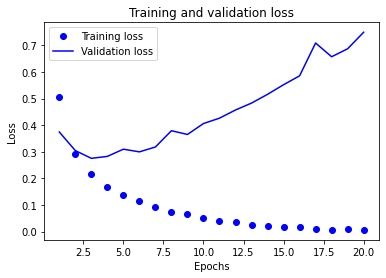

In [35]:
# plot hist
history_dict = hist_imdb.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

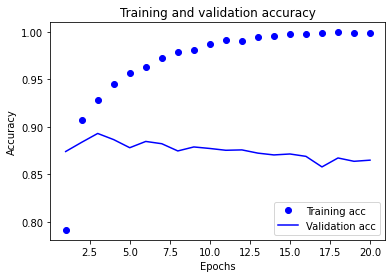

In [36]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
# evlauate model
model_imdb.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.8032 - accuracy: 0.8504


[0.8031788468360901, 0.8503599762916565]

In [38]:
# generate prediction
model_imdb.predict(x_test)

array([[0.01196548],
       [1.        ],
       [0.99942386],
       ...,
       [0.00572336],
       [0.01897046],
       [0.9671338 ]], dtype=float32)

# Multiclass Classification: Reuters Dataset

In [39]:
# load reuters data
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

2121728/2110848 [==============================] - 0s 0us/step


In [42]:
# view data decoded as english
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in     train_data[0]])

decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [43]:
# prep training data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [45]:
# one-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [46]:
# set validation data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [47]:
# build, compile, fit model
model_reuters = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(46, activation="softmax"),
])

model_reuters.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

hist_reuters = model_reuters.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 44ms/step - loss: 2.6544 - accuracy: 0.5263 - val_loss: 1.7322 - val_accuracy: 0.6630
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.4053 - accuracy: 0.7140 - val_loss: 1.2942 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 1.0392 - accuracy: 0.7791 - val_loss: 1.1360 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 1s 33ms/step - loss: 0.8165 - accuracy: 0.8257 - val_loss: 1.0467 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 34ms/step - loss: 0.6492 - accuracy: 0.8634 - val_loss: 1.0011 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5229 - accuracy: 0.8903 - val_loss: 0.9059 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 1s 31ms/step - loss: 0.4133 - accuracy: 0.9142 - val_loss: 0.8956 - val_accuracy: 0.8100
Epoch 8/20
16

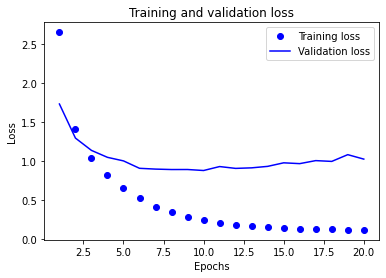

In [49]:
# plot loss
loss = hist_reuters.history["loss"]
val_loss = hist_reuters.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

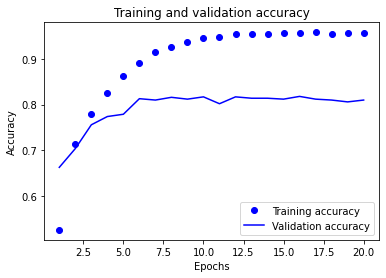

In [50]:
# plot accuracy
plt.clf()
acc = hist_reuters.history["accuracy"]
val_acc = hist_reuters.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
# evaluate
model_reuters.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.2211 - accuracy: 0.7863


[1.2210605144500732, 0.7862867116928101]

In [55]:
# create predicition of first test sample
np.argmax(model_reuters.predict(x_test)[0])

3

# Regression: Boston Housing Price Dataset

In [56]:
# load data
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [59]:
# normalizing dataset
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [65]:
# build, compile model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    model.compile(
        optimizer="rmsprop", 
        loss="mse", 
        metrics=["mae"]
    )
    return model

In [67]:
# incorporate k-fold validation
k = 4 
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    model_boston = build_model()
    hist_boston = model_boston.fit(
        partial_train_data, 
        partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, 
        batch_size=16, 
        verbose=0
    )
    mae_history = hist_boston.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [68]:
# view average validation mae
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

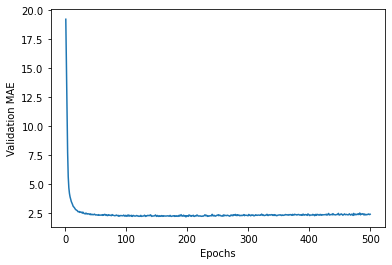

In [69]:
# plot average mae history
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

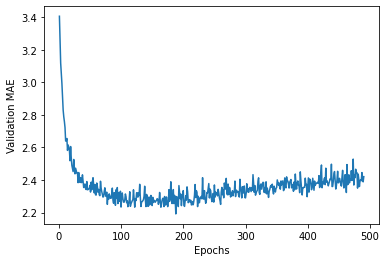

In [70]:
# plot average mae history (first 10)
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [71]:
# build final model
model_boston_final = build_model()
model_boston_final.fit(
    train_data, 
    train_targets,
    epochs=130, 
    batch_size=16, 
    verbose=0
)
test_mse_score, test_mae_score = model_boston_final.evaluate(
    test_data, 
    test_targets
)

4/4 [==============================] - 0s 3ms/step - loss: 13.6298 - mae: 2.3556


In [72]:
# check score
test_mae_score

2.3556344509124756

In [73]:
# create prediction
model_boston_final.predict(test_data)[0]

array([7.299856], dtype=float32)